In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Establecer la opción para mostrar todas las columnas
pd.set_option('display.max_columns', None)

Cargamos el primer archivo con el que vamos a trabajar.

In [210]:
movies_raw_csv = pd.read_csv('data/data_raw/movies_dataset.csv',low_memory=False)
movies_raw_csv.info()
movies_raw_csv.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


In [211]:
(
    movies_raw_csv
    .isnull()
    .sum()
)

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

Tenemos una base de datos de peliculas, la cual contiene 45466 filas y 24 columnas.
Las columnas 'belongs_to_collection', 'genres', 'production_companies','production_countries' y 'spoken_languages' poseen datos anidados.
Analizando la información del df podemos notar que 6 peliculas tienen valores nulos en el campo 'title' pero no en el campo 'original_title'. Buscaremos esas filas.

In [212]:
movies_raw_csv[movies_raw_csv['title'].isnull()]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19729,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,82663,tt0113002,en,Midnight Man,British soldiers force a recently captured IRA...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Midnight Man,False,6.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29502,False,"{'id': 122661, 'name': 'Mardock Scramble Colle...",0,"[{'id': 16, 'name': 'Animation'}, {'id': 878, ...",http://m-scramble.jp/exhaust/,122662,tt2423504,ja,マルドゥック・スクランブル 排気,Third film of the Mardock Scramble series.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,NaN,Mardock Scramble: The Third Exhaust,False,7.0,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35586,False,NaN,0,"[{'id': 10770, 'name': 'TV Movie'}, {'id': 28,...",NaN,249260,tt2622826,en,Avalanche Sharks,A group of skiers are terrorized during spring...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Beware Of Frost Bites,Avalanche Sharks,False,4.3,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Valores nulos

Estas 6 filas también se eliminaran ya que la mayoría de sus datos son nulos o inconsistentes.

In [213]:
indice = movies_raw_csv[movies_raw_csv['title'].isnull()].index
indice

Int64Index([19729, 19730, 29502, 29503, 35586, 35587], dtype='int64')

In [214]:
movies_df = movies_raw_csv.drop(index=indice, inplace=False)

In [215]:
movies_raw_csv.shape

(45466, 24)

In [216]:
#Comprobamos que se eliminaron las 6 filas.
movies_df.shape

(45460, 24)

Valores duplicados

In [217]:
#filas duplicadas
(
    movies_df
    .duplicated(keep=False)
    .sum()
)

33

In [218]:
#Eliminamos las filas duplicadas
movies_df = movies_df.drop_duplicates()

In [219]:
# Filas con campo id duplicado /  Una misma pelicula aparece varias veces en el dataframe.
(
    movies_df
    .duplicated(subset='id',keep=False)
    .sum()
)

26

In [220]:
movies_df[movies_df.duplicated(subset='id',keep=False)].sort_values(['id', 'vote_count']).shape

(26, 24)

Tenemos 26 filas que poseen el mismo 'id'

In [221]:
movies_df.value_counts('status',sort=True)

status
Released           44998
Rumored              229
Post Production       98
In Production         20
Planned               15
Canceled               2
dtype: int64

Trabajaremos solo con las peliculas que ya fueron estrenadas

In [222]:
movies_df = movies_df[movies_df.status == 'Released']

In [223]:
#cambiamos el nombre de la columna id a id_movie
movies_df = movies_df.rename({'id': 'id_movie'}, axis=1)

In [224]:
#Nos aseguramos que los títulos se encuentren en formato .title
movies_df['title'] = movies_df['title'].apply(lambda x: x.title())

In [225]:
movies_df = movies_df.sort_values(['id_movie', 'vote_count'])

In [226]:
# Visualizar las filas con ids duplicados
# movies_df[movies_df.duplicated(subset='id_movie',keep=False)]

In [227]:
#Eliminamos las filas con ids duplicados manteniendo la que posee mayor popularidad
movies_df = movies_df.drop_duplicates(subset='id_movie',keep='first')

------------------

# Requerimientos

Se solicitan los siguientes requerimientos:

1- (x) Eliminar las columnas que no serán utilizadas, video,imdb_id,adult,original_title,poster_path y homepage. 

2- (X) Los valores nulos de los campos revenue, budget deben ser rellenados por el número 0.

3- (x) Los valores nulos del campo release date deben eliminarse.

4- (x) Crear la columna con el retorno de inversión, llamada return con los campos revenue y budget, dividiendo estas dos últimas revenue / budget, cuando no hay datos disponibles para calcularlo, deberá tomar el valor 0.

5- (x) De haber fechas, deberán tener el formato AAAA-mm-dd, además deberán crear la columna release_year donde extraerán el año de la fecha de estreno.

6- Algunos campos, como belongs_to_collection, production_companies y otros (ver diccionario de datos) están anidados, esto es o bien tienen un diccionario o una lista como valores en cada fila, ¡deberán desanidarlos y unirlos al dataset de nuevo para hacer alguna de las consultas de la API! O bien buscar la manera de acceder a esos datos sin desanidarlos.

----------------

1- Eliminar las columnas video, imdb_id,adult, original_title, poster_path y homepage. 

In [228]:
movies_df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'id_movie', 'imdb_id', 'original_language', 'original_title',
       'overview', 'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [229]:
movies_df = movies_df[['id_movie','title','tagline','overview','genres','runtime', 'release_date', 'status',
                 'belongs_to_collection',
                 'original_language', 'spoken_languages',
                 'production_companies', 'production_countries',
                 'popularity','vote_average', 'vote_count',
                 'budget','revenue'
]]

In [230]:
print(f'Ahora tenemos un df de {movies_df.shape[0]} filas y {movies_df.shape[1]} columnas.')

Ahora tenemos un df de 44985 filas y 18 columnas.


-------------------

2- Los valores nulos de los campos revenue, budget deben ser rellenados por el número 0.

In [231]:
movies_df['budget'].fillna(0, inplace=True)
movies_df['revenue'].fillna(0, inplace=True)

---

3- Los valores nulos del campo release date deben eliminarse.

In [232]:
(
    movies_df
    .release_date
    .isnull()
    .sum()
)

78

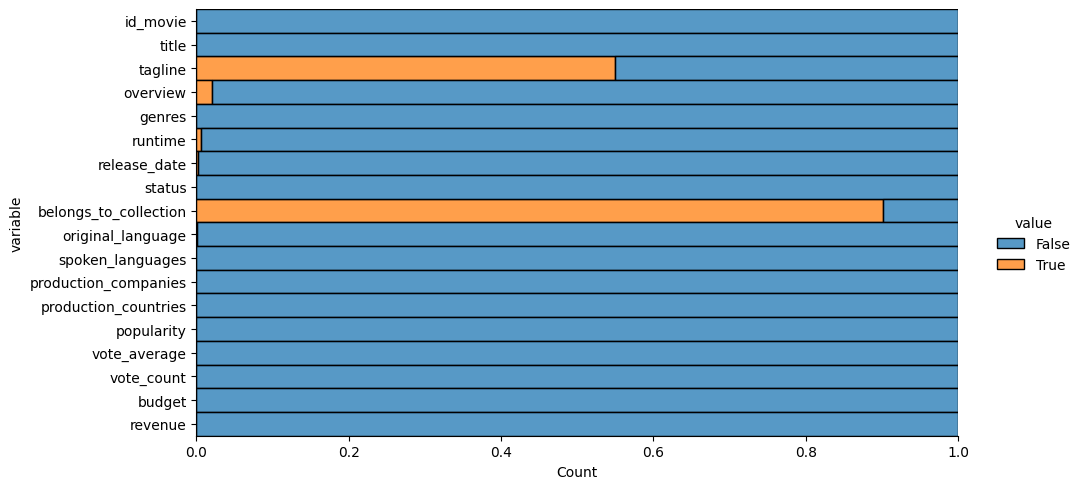

In [233]:
(
    movies_df
    .isnull()
    .melt()
    .pipe(
        lambda df : (
            sns.displot(
                data = df,
                y ='variable',
                hue ='value',
                multiple = 'fill',
                aspect = 2 )
        )
    )
)


Solo 84 filas poseen valores nulos en release_date, estas representan menos del 1% por lo que procederemos a eliminarlas.

In [234]:
movies_df.shape

(44985, 18)

In [235]:
movies_df = movies_df.dropna(subset='release_date')

In [236]:
movies_df.shape

(44907, 18)

---------------

4- Crear la columna con el retorno de inversión, llamada return con los campos revenue y budget, dividiendo estas dos últimas revenue / budget, cuando no hay datos disponibles para calcularlo, deberá tomar el valor 0.

In [237]:
# funcion que permite calcular el return
def ret(df,col1,col2):
    if df[col1] == 0:
        out = 0

    else:    
        out = df[col2] / df[col1]
    return out


In [238]:
movies_df.budget[~movies_df.budget.str.contains('[0-9]')]

Series([], Name: budget, dtype: object)

In [239]:
# corregimos el tipo de las columnas budget y revenue y nos aseguramos re remplazar los valores nulos de budget por 0
movies_df['budget'] = movies_df['budget'].astype(float)
movies_df['revenue'] = movies_df['revenue'].astype(float)

# creamos la columna return
movies_df.insert(movies_df.columns.get_loc('revenue') + 1, 'return', movies_df.apply(ret,axis=1,args={'budget','revenue'}))


------------

5- De haber fechas, deberán tener el formato AAAA-mm-dd, además deberán crear la columna release_year donde extraerán el año de la fecha de estreno.

In [240]:
#cambiamos los tipos de datos de la columna 'release_date'
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'], format='%Y-%m-%d',yearfirst=True, errors='coerce')

In [241]:
#Creamos la columna 'release_year'
movies_df.insert(movies_df.columns.get_loc('release_date') + 1, 'release_year', movies_df['release_date'].dt.year)

In [242]:
# movies_df.head(2)

------------

6- Algunos campos, como belongs_to_collection, production_companies y otros (ver diccionario de datos) están anidados, esto es o bien tienen un diccionario o una lista como valores en cada fila, ¡deberán desanidarlos y unirlos al dataset de nuevo para hacer alguna de las consultas de la API! O bien buscar la manera de acceder a esos datos sin desanidarlos..

Como se mencionó anteriormente, las columnas que poseen datos anidados son: 'belongs_to_collection', 'genres', 'production_companies','production_countries' y 'spoken_languages'

Consideraciones:

(x) Para la función peliculas_idioma nos piden devolver la cantidad de películas producidas en ese idioma. Por lo que no utilizaremos la columna spoken_language y será eliminada.

(x) Para la función peliculas_duracion utilizaremos la columna runtime

(x) Para la funcion franquicia deberemos desanidar la columna belongs_to_collection

(x) Para la función pais deberemos desanidar la columna production_countries

(x) Para la función productoras_exitosas deberemos desanidar la columna production_companies

(x)La columna genres la utilizaremos para el sistema de recomendacion por lo que la deberemos desanidar.

(x) Para la función get_director deberemos usar el dataset credits. (ver etl_credists.ipynb)

índice de tablas:
- Tabla Collections
- Tabla genres
- Tabla movies

----

In [243]:
# # Eliminamos la columna 'spoken_languages'
# movies_df = movies_df.drop(columns=['spoken_languages'])

In [244]:
movies_df.columns

Index(['id_movie', 'title', 'tagline', 'overview', 'genres', 'runtime',
       'release_date', 'release_year', 'status', 'belongs_to_collection',
       'original_language', 'spoken_languages', 'production_companies',
       'production_countries', 'popularity', 'vote_average', 'vote_count',
       'budget', 'revenue', 'return'],
      dtype='object')

------

# Cración de tablas


---------

# Tabla Collections y movies_collections

Creación de la tabla 'collections' la cual contendrá información sobre las colecciones. Columnas: 'id_collection' y 'name_collection'

In [245]:
movies_df[['belongs_to_collection']]

,belongs_to_collection
2429,NaN
13609,NaN
4435,NaN
17451,NaN
36946,NaN
...,...
25652,NaN
3767,NaN
12549,NaN
25079,NaN


In [246]:
print(
    movies_df[['belongs_to_collection']]
    .dropna()
    .drop_duplicates()
    .shape[0]
    )

print(
    movies_df[['belongs_to_collection']]
    .dropna()
    .drop_duplicates()
    .explode('belongs_to_collection')
    .shape[0]
    )


    

1691
1691


In [247]:
# cremaos la columna 'name_collecction', extraemos sus valores de la columna belongs_to_collection y luego eliminamos esta última.

# # Definimos una expresión regular para extraer el id del campo "id" de la columna belongs_to_collection
regex_name = r"'name':\s*'([^']+)"
regex_id = r"'id':\s*([\d]+)"


# # Utilizamos la función "str.extract" para extraer el id y guardarlo en una nueva columna 'name_collection'
movies_df['name_collection'] = movies_df['belongs_to_collection'].str.extract(regex_name)
movies_df['id_collection'] = movies_df['belongs_to_collection'].str.extract(regex_id)

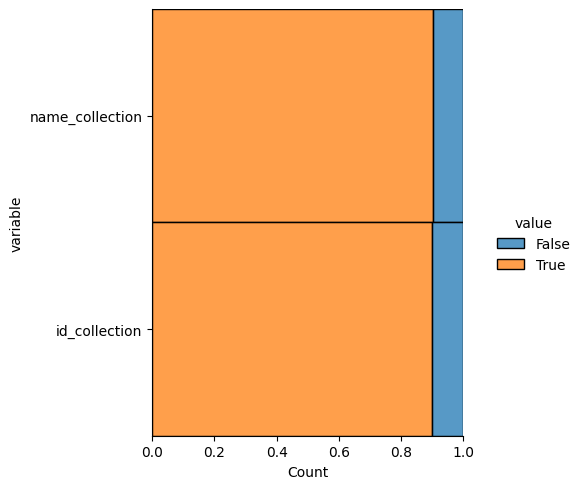

In [248]:
(
    movies_df[['name_collection','id_collection']]
    .isnull()
    .melt()
    .pipe(
        lambda df : (
            sns.displot(
                data = df,
                y ='variable',
                hue ='value',
                multiple = 'fill',
             )
        )
    )
)


In [249]:
movies_df[movies_df['id_collection']==0]

,id_movie,title,tagline,overview,genres,runtime,release_date,release_year,status,belongs_to_collection,original_language,spoken_languages,production_companies,production_countries,popularity,vote_average,vote_count,budget,revenue,return,name_collection,id_collection


In [250]:
# definiremos el id 0 para aquellos items que no posean colección
movies_df['name_collection'] = movies_df['name_collection'].fillna('no collection')
movies_df['id_collection'] = movies_df['id_collection'].fillna(int(0))

In [251]:
# collections = movies_df[['id_movie','name_collection','revenue']]
collections_df = movies_df[['id_collection','name_collection']]
# movies_collections_df = movies_df[['id_movie_']]

In [252]:
# Inicial de las palabras con mayusculas
collections_df['name_collection'] = collections_df['name_collection'].apply(lambda x: x.title().strip())

C:\Users\Usuario\AppData\Local\Temp\ipykernel_10120\2460585649.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  collections_df['name_collection'] = collections_df['name_collection'].apply(lambda x: x.title().strip())


In [253]:
collections_df = collections_df.drop_duplicates()

In [254]:
movies_collections_df = movies_df[['id_movie','id_collection']]
movies_collections_df

,id_movie,id_collection
2429,100,0
13609,10000,0
4435,10001,0
17451,100010,0
36946,100017,0
...,...,...
25652,99946,0
3767,9995,0
12549,9997,0
25079,99977,0


In [255]:
# crear el csv 
collections_df.to_csv("data/data_processed/collections_df.csv",index=False)
movies_collections_df.to_csv("data/data_processed/movies_collections.csv",index=False)

---------

# Tabla genres y movies_genres

Creacion de la tabla genres que utilizaremos para el sistema de recomendación y sus tablas auxiliares.

In [256]:
movies_df.head(2)

,id_movie,title,tagline,overview,genres,runtime,release_date,release_year,status,belongs_to_collection,original_language,spoken_languages,production_companies,production_countries,popularity,vote_average,vote_count,budget,revenue,return,name_collection,id_collection
2429,100,"Lock, Stock And Two Smoking Barrels",A Disgrace to Criminals Everywhere.,A card sharp and his unwillingly-enlisted frie...,"[{'id': 35, 'name': 'Comedy'}, {'id': 80, 'nam...",105.0,1998-03-05,1998,Released,NaN,en,"[{'iso_639_1': 'en', 'name': 'English'}]","[{'name': 'Handmade Films Ltd.', 'id': 146}, {...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",4.60786,7.5,1671.0,1350000.0,3897569.0,2.887088,no collection,0
13609,10000,La Estrategia Del Caracol,NaN,A group of tenants living in an old house are ...,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",116.0,1993-12-25,1993,Released,NaN,es,"[{'iso_639_1': 'es', 'name': 'Español'}]",[{'name': 'Ministère de la Culture et de la Fr...,"[{'iso_3166_1': 'CO', 'name': 'Colombia'}, {'i...",0.281609,7.2,9.0,0.0,0.0,0.000000,no collection,0


In [257]:
movies_df[movies_df.genres == '[]'].shape


(2327, 22)

In [258]:
# Existe el id =0 ?
movies_df.genres.astype(str).str.contains(r"'id': 0").any()

False

In [259]:
genres = movies_df[['id_movie','genres']].copy()
genres['genres'] = genres['genres'] .replace("[]", "[{'id': 0, 'name': 'no genre'}]")  #

genres['genres'] = genres['genres'].apply(ast.literal_eval) # Convertir el string a lista de diccionarios
# Aplicamos explode() para crear filas adicionales para cada elemento en la lista production_countries
genres = genres.explode('genres')

# # # Extraer el valor de id_production_countries y name_production_countries de cada elemento en la lista production_countries
genres['id_genre'] = genres['genres'].apply(lambda x: x['id'])
genres['name_genre'] = genres['genres'].apply(lambda x: x['name'])
genres

,id_movie,genres,id_genre,name_genre
2429,100,"{'id': 35, 'name': 'Comedy'}",35,Comedy
2429,100,"{'id': 80, 'name': 'Crime'}",80,Crime
13609,10000,"{'id': 35, 'name': 'Comedy'}",35,Comedy
13609,10000,"{'id': 18, 'name': 'Drama'}",18,Drama
4435,10001,"{'id': 35, 'name': 'Comedy'}",35,Comedy
...,...,...,...,...
12549,9997,"{'id': 28, 'name': 'Action'}",28,Action
12549,9997,"{'id': 878, 'name': 'Science Fiction'}",878,Science Fiction
25079,99977,"{'id': 35, 'name': 'Comedy'}",35,Comedy
13106,9999,"{'id': 80, 'name': 'Crime'}",80,Crime


In [260]:
movies_genres_df = genres[['id_movie','id_genre']].drop_duplicates().reset_index(drop=True)
movies_genres_df

,id_movie,id_genre
0,100,35
1,100,80
2,10000,35
3,10000,18
4,10001,35
...,...,...
92530,9997,28
92531,9997,878
92532,99977,35
92533,9999,80


In [261]:
genres_df = genres[['id_genre','name_genre']].drop_duplicates().sort_values('name_genre').reset_index(drop=True)
genres_df.name_genre = genres_df.name_genre.str.title()

genres_df

,id_genre,name_genre
0,28,Action
1,12,Adventure
2,16,Animation
3,35,Comedy
4,80,Crime
5,99,Documentary
6,18,Drama
7,10751,Family
8,14,Fantasy
9,10769,Foreign


In [262]:
# crear el csv 
genres_df.to_csv("data/data_processed/genres_df.csv",index=False)
movies_genres_df.to_csv("data/data_processed/movies_genres_df.csv",index=False)

------

In [263]:
movies_df = movies_df[['id_movie', 'title', 'tagline', 'overview','id_collection', 'runtime',
       'release_date', 'release_year','popularity', 'vote_average', 'vote_count', 'budget', 'revenue',
       'return']]

#cambiamos los tipos de datos de las columnas
movies_df = movies_df.astype({'id_movie' : 'int64', 
                        # 'title':'str',
                        # 'tagline':'str',
                        # 'overview':'str',
                        # 'original_language':'category',
                        # # 'runtime':'int', # posee valores nan por lo que aun no podemos cambiarlo a int
                        # 'release_date': ,  # se tratará mas adelante
                        'budget': 'int64', 
                        'revenue': 'int64', 
                        'vote_count': 'int64', 
                        'vote_average': 'int', 
                        # 'popularity'
                        }, copy=False, errors='raise')


----

Corrección de errores:

Error al cargar la columna runtime en sql

In [265]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44907 entries, 2429 to 13106
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id_movie       44907 non-null  int64         
 1   title          44907 non-null  object        
 2   tagline        20276 non-null  object        
 3   overview       44000 non-null  object        
 4   id_collection  44907 non-null  object        
 5   runtime        44667 non-null  float64       
 6   release_date   44907 non-null  datetime64[ns]
 7   release_year   44907 non-null  int64         
 8   popularity     44907 non-null  object        
 9   vote_average   44907 non-null  int32         
 10  vote_count     44907 non-null  int64         
 11  budget         44907 non-null  int64         
 12  revenue        44907 non-null  int64         
 13  return         44907 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(1), int64(5), object(5)
mem

In [269]:
movies_df[movies_df.runtime.isna()].sort_values(by='popularity').tail(10)

,id_movie,title,tagline,overview,id_collection,runtime,release_date,release_year,popularity,vote_average,vote_count,budget,revenue,return
41922,392832,Nemiche Per La Pelle,NaN,NaN,0,NaN,2016-04-14,2016,1.504535,5,31,0,0,0.0
31556,270479,Ammutta Muddica Al Cinema,NaN,NaN,0,NaN,2013-10-16,2013,1.793601,6,43,0,0,0.0
42149,428645,Eu Fico Loko,NaN,NaN,0,NaN,2017-01-12,2017,1.948382,8,22,2500000,0,0.0
43681,191486,Поезд Вне Расписания,NaN,NaN,0,NaN,1986-05-12,1986,1e-06,4,2,0,0,0.0
37813,177714,Mágica Aventura,NaN,NaN,0,NaN,1973-06-09,1973,1e-06,0,0,0,0,0.0
35491,298722,Soap Opera,NaN,NaN,0,NaN,2014-10-23,2014,2.012232,5,46,0,0,0.0
41372,216647,Aschenputtel,NaN,NaN,0,NaN,1989-01-01,1989,2.1e-05,0,0,0,0,0.0
45062,382995,George !,NaN,NaN,0,NaN,1972-06-03,1972,3e-06,0,0,0,0,0.0
32508,316170,Uomo E Galantuomo,NaN,NaN,0,NaN,1975-12-26,1975,5.3e-05,0,0,0,0,0.0
25677,197335,Se Tutto Va Bene Siamo Rovinati,NaN,NaN,0,NaN,1983-12-29,1983,9.4e-05,0,0,0,0,0.0


Debido a que estas peliculas datos nulos o 0 en varias de sus columnas y una populridad menor a 2 decidimos eliminarlas.

In [270]:
movies_df = movies_df[~movies_df.runtime.isna()]

In [271]:
movies_df.to_csv("data/data_processed/movies_df.csv",index=False)

Error al cargar la tabla movies_genres en SQL. (Tabajo en curso)

In [277]:
sorted(genres_df.id_genre.unique())

[0,
 12,
 14,
 16,
 18,
 27,
 28,
 35,
 36,
 37,
 53,
 80,
 99,
 878,
 9648,
 10402,
 10749,
 10751,
 10752,
 10769,
 10770]

In [278]:
sorted(movies_genres_df.id_genre.unique())

[0,
 12,
 14,
 16,
 18,
 27,
 28,
 35,
 36,
 37,
 53,
 80,
 99,
 878,
 9648,
 10402,
 10749,
 10751,
 10752,
 10769,
 10770]